In [27]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
#Load the California Housing Dataset
housing = fetch_california_housing()
data = pd.DataFrame(housing.data, columns=housing.feature_names)

In [5]:
 #features (longitude, latitude, and median_income)
data_subset = data[['Longitude', 'Latitude', 'MedInc']]

In [7]:
#Apply K-Means Clustering (choosing 5 clusters)
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_subset)

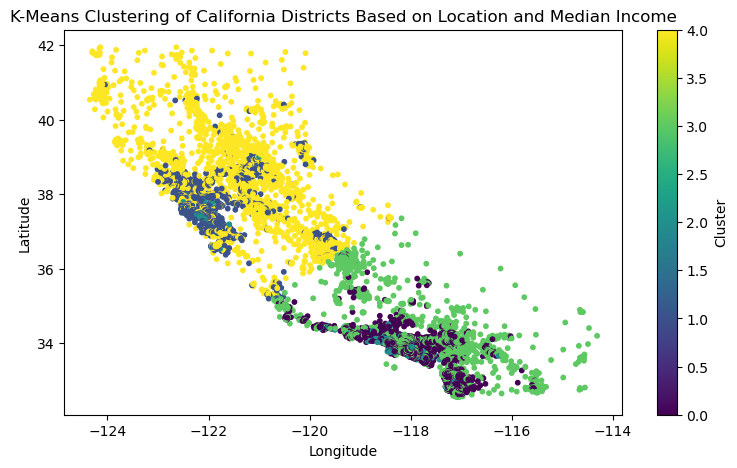

In [15]:
#Visualize the clusters (Plotting longitude vs latitude and color-coding by cluster)
plt.figure(figsize=(9, 5))
plt.scatter(data['Longitude'], data['Latitude'], c=data['Cluster'], cmap='viridis', s=10)
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means Clustering of California Districts Based on Location and Median Income')
plt.show()

Number of clusters: 2, Silhouette Score: 0.566509491976379
Number of clusters: 3, Silhouette Score: 0.5134953776441159
Number of clusters: 4, Silhouette Score: 0.4237838153559469
Number of clusters: 5, Silhouette Score: 0.37726223284399574
Number of clusters: 6, Silhouette Score: 0.3954599683853833
Number of clusters: 7, Silhouette Score: 0.3629079119139082
The optimal number of clusters is: 2


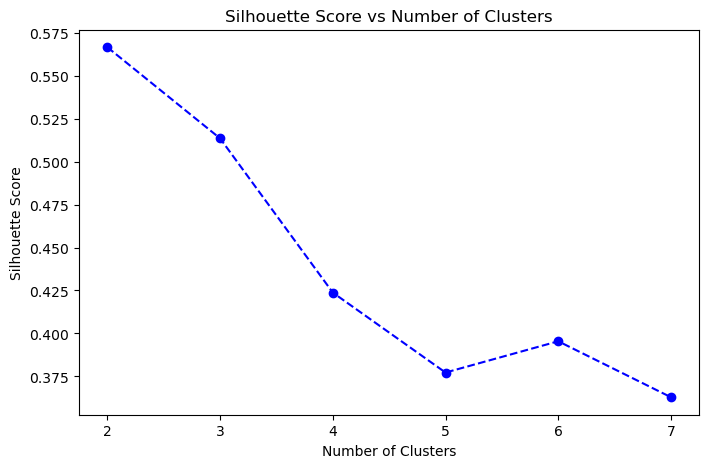

In [74]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Calculate Silhouette Score for cluster
silhouette_scores = []
cluster_range = list(range(2, 8))

#Calculating silhouette scores number of clusters using for loop
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data_subset)
    
    
    score = silhouette_score(data_subset, cluster_labels)
    silhouette_scores.append(score)
    print(f"Number of clusters: {n_clusters}, Silhouette Score: {score}")

# Finding no.of clusters with the highest silhouette score
optimal_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters is: {optimal_clusters}")

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()


In [ ]:
#elbow method findings.

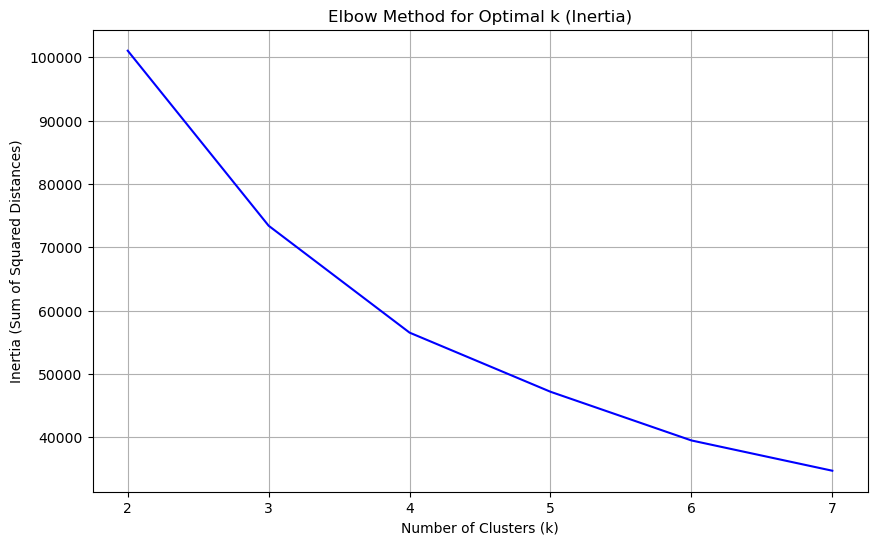

In [72]:
# Calculating the Inertia for different values of k
inertia_scores = []
k_values = list(range(2, 8))  # Trying k from 2 to 7

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_subset)

    inertia_scores.append(kmeans.inertia_)

# Plot the Elbow Method 
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_scores, color='blue', label='Inertia')
plt.title('Elbow Method for Optimal k (Inertia)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()

In [76]:
# Calculating differences between successive inertia scores
inertia_diff = [inertia_scores[i] - inertia_scores[i+1] for i in range(len(inertia_scores)-1)]

# Finding the index of the largest drop in inertia (at elbow point)
optimal_k_index = inertia_diff.index(max(inertia_diff)) + 1  # +1 to match the cluster number
optimal_k = k_values[optimal_k_index]

print(f'The best number of clusters (k) based on the Elbow Method is: {optimal_k}')

The best number of clusters (k) based on the Elbow Method is: 3


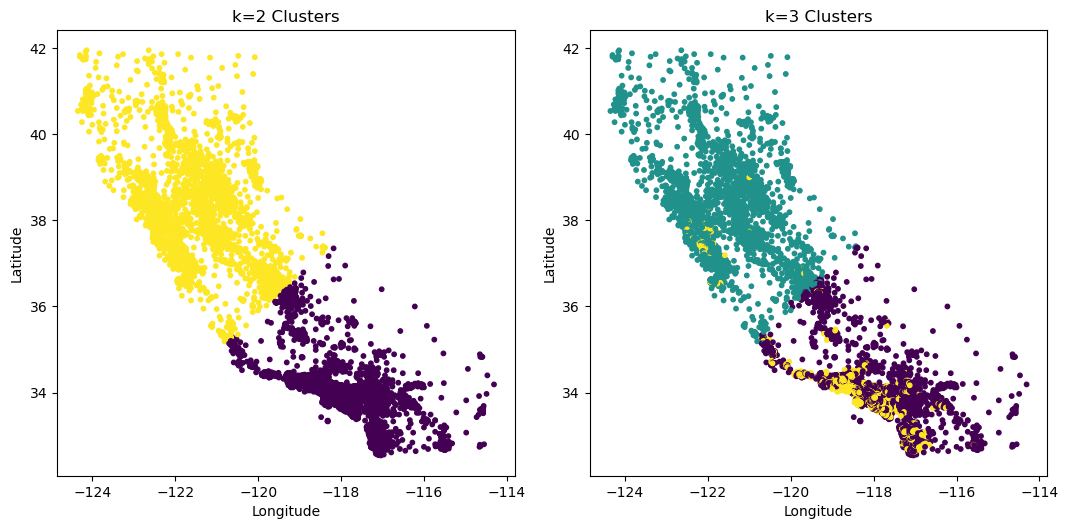

In [84]:
k_values = list(range(2, 4))  # Trying k from 2 to 3

plt.figure(figsize=(16, 10))
for i, k in enumerate(k_values, 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    data['Cluster'] = kmeans.fit_predict(data_subset)
    
    # Plotting longitude vs latitude
    plt.subplot(2, 3, i)
    plt.scatter(data['Longitude'], data['Latitude'], c=data['Cluster'], cmap='viridis', s=10)
    plt.title(f'k={k} Clusters')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

plt.tight_layout()
plt.show()


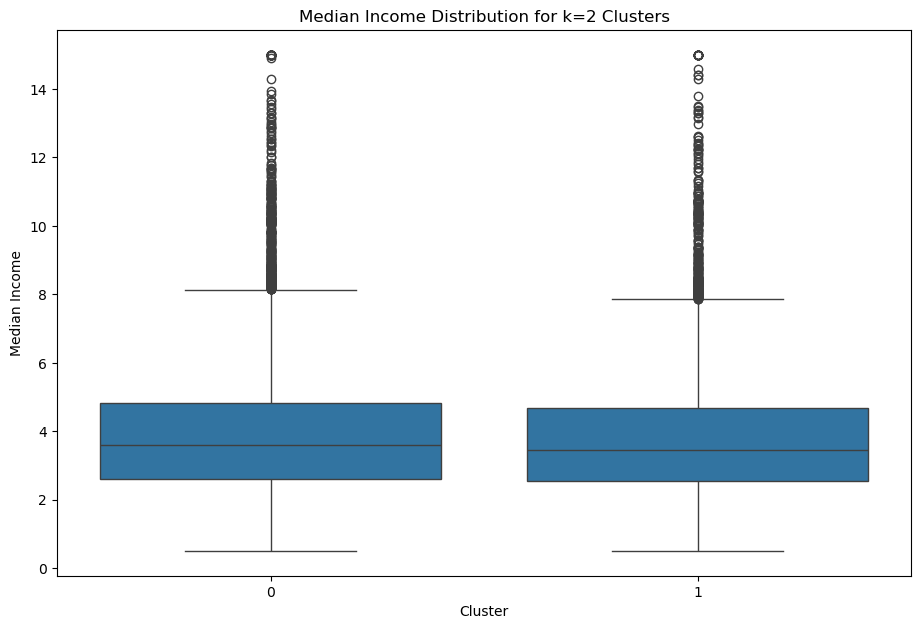

In [96]:

import seaborn as sns

#Function to perform KMeans clustering and add cluster labels to the dataset
def apply_kmeans(k, data_subset):
    kmeans = KMeans(n_clusters=k, random_state=42)
    data['Cluster'] = kmeans.fit_predict(data_subset)
    return data

# Visualize the distribution of Median Income for k=2
k_value = [2]

plt.figure(figsize=(18, 12))  # Set figure size

for i, k in enumerate(k_value, 1):
    data = apply_kmeans(k, data_subset)
    
    plt.subplot(2, 2, i)
    sns.boxplot(x='Cluster', y='MedInc', data=data)
    plt.title(f'Median Income Distribution for k={k} Clusters')
    plt.xlabel('Cluster')
    plt.ylabel('Median Income')

plt.tight_layout()
plt.show()

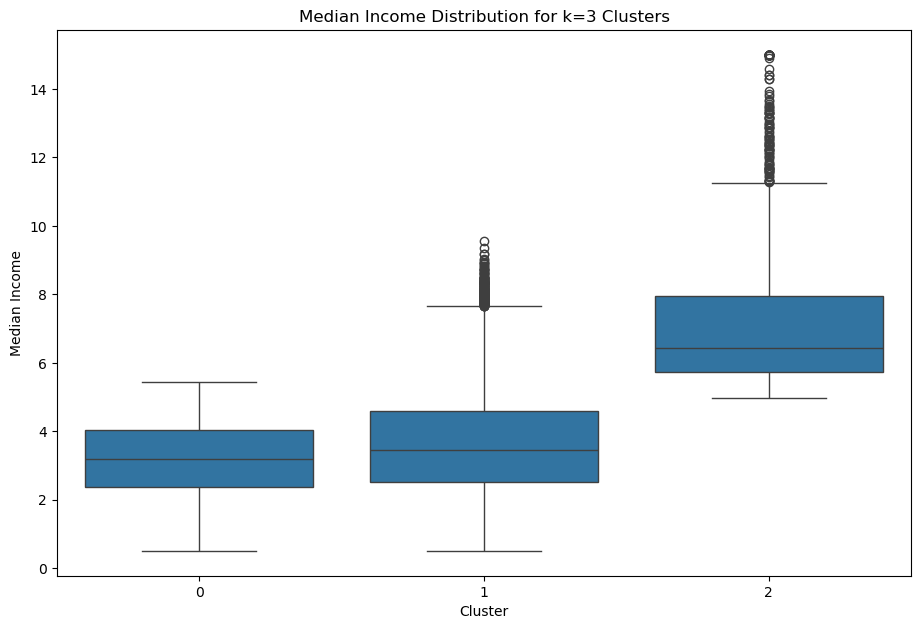

In [98]:

import seaborn as sns


def apply_kmeans(k, data_subset):
    kmeans = KMeans(n_clusters=k, random_state=42)
    data['Cluster'] = kmeans.fit_predict(data_subset)
    return data


k_value = [3]

plt.figure(figsize=(18, 12))  # Set figure size

for i, k in enumerate(k_value, 1):
    data = apply_kmeans(k, data_subset)
    
    # Create a subplot for each k
    plt.subplot(2, 2, i)
    sns.boxplot(x='Cluster', y='MedInc', data=data)
    plt.title(f'Median Income Distribution for k={k} Clusters')
    plt.xlabel('Cluster')
    plt.ylabel('Median Income')

plt.tight_layout()
plt.show()


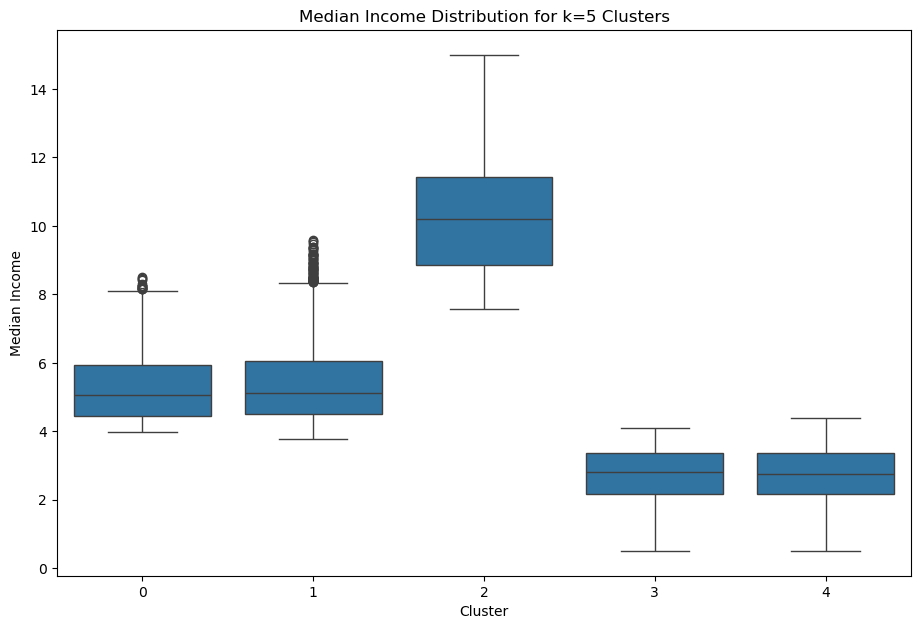

In [100]:

import seaborn as sns


def apply_kmeans(k, data_subset):
    kmeans = KMeans(n_clusters=k, random_state=42)
    data['Cluster'] = kmeans.fit_predict(data_subset)
    return data


k_value = [5]

plt.figure(figsize=(18, 12))  # Set figure size

for i, k in enumerate(k_values, 1):
    data = apply_kmeans(k, data_subset)

    plt.subplot(2, 2, i)
    sns.boxplot(x='Cluster', y='MedInc', data=data)
    plt.title(f'Median Income Distribution for k={k} Clusters')
    plt.xlabel('Cluster')
    plt.ylabel('Median Income')

plt.tight_layout()
plt.show()
